In [1]:
# # DO THIS ONLY ONCE, comment it out after the first run. Takes ~12 minutes.
# # Clone https://github.com/IDEA-Research/GroundingDINO.git on shell
# !git clone https://github.com/IDEA-Research/GroundingDINO.git
# # cd to the cloned directory
# !cd GroundingDINO
# # Install the package
# !pip install -e .
# # Download the pretrained model
# !mkdir weights
# !cd weights
# !wget -v https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
# !cd ..

In [2]:
import os
import supervision as sv
import torch

# import sys; sys.path.append("GroundingDINO")
from groundingdino.util.inference import load_model, load_image, predict, annotate

In [3]:
%matplotlib notebook
%matplotlib inline 

In [4]:
gd_dir = "GroundingDINO"
# gd_checkpoint_dir = os.path.join(gd_dir, "weights")
gd_checkpoint_dir = "weights"
gd_config_dir = os.path.join(gd_dir, "groundingdino/config")
assert os.path.exists(gd_dir)
assert os.path.exists(gd_checkpoint_dir)
assert os.path.exists(gd_config_dir)


GROUNDING_DINO_CONFIG = os.path.join(gd_config_dir, "GroundingDINO_SwinT_OGC.py") 
GROUNDING_DINO_CHECKPOINT = os.path.join(gd_checkpoint_dir, "groundingdino_swint_ogc.pth")
assert os.path.exists(GROUNDING_DINO_CONFIG)
assert os.path.exists(GROUNDING_DINO_CHECKPOINT)

In [5]:
gd_checkpoint_dir

'weights'

In [6]:
model = load_model(GROUNDING_DINO_CONFIG, GROUNDING_DINO_CHECKPOINT)

final text_encoder_type: bert-base-uncased


CPU Autocast only supports dtype of torch.bfloat16, torch.float16 currently.


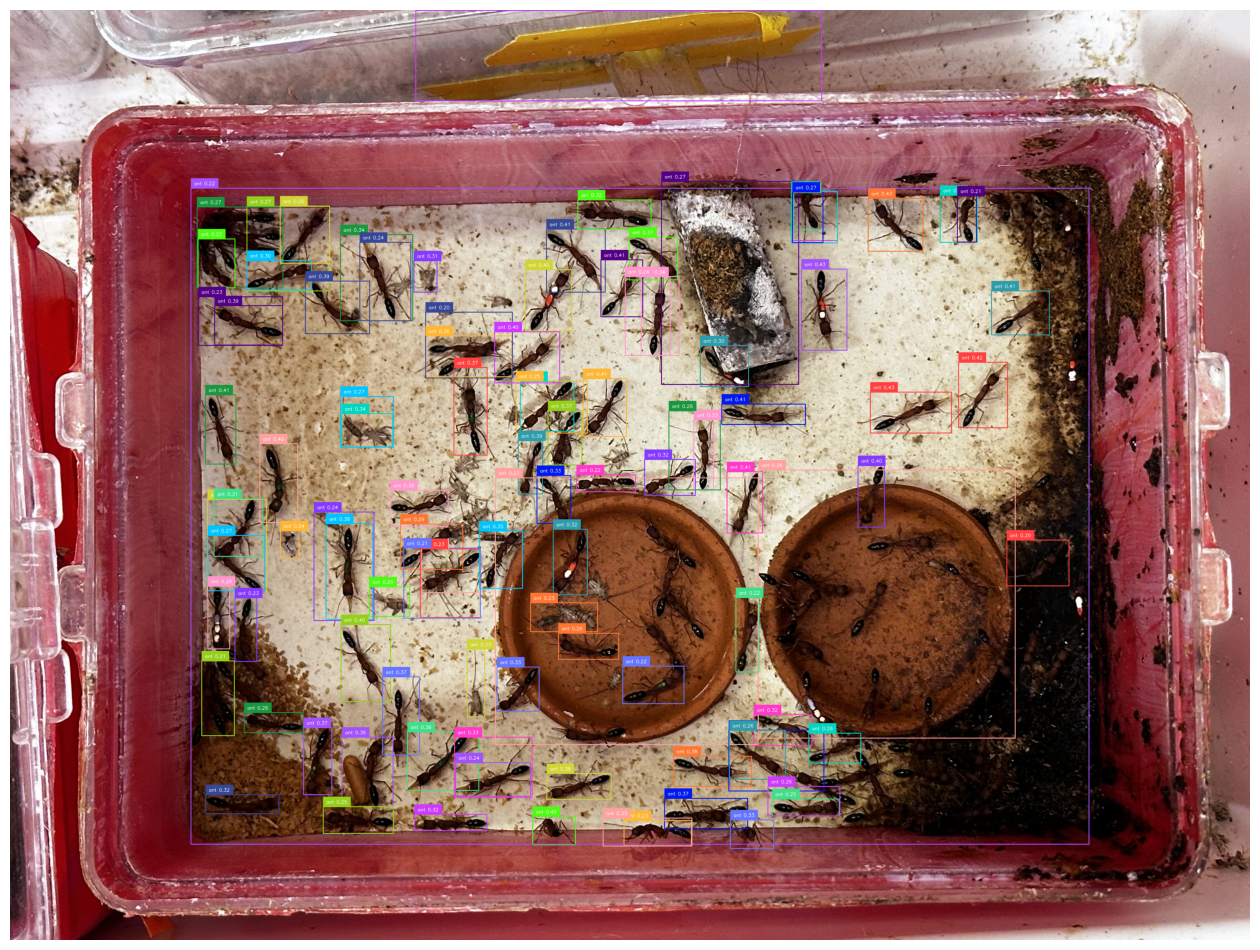

Number of ants detected:  104


In [7]:
# IMAGE_PATH = "ant.jpeg"
IMAGE_PATH = "ant_images/IMG_5793.jpeg"
image_source, image = load_image(IMAGE_PATH)

TEXT_PROMPT = "ant"
BOX_TRESHOLD = 0.2
TEXT_TRESHOLD = 0.20

# with torch.autocast(device_type="cuda", dtype=torch.float32):
#     boxes, logits, phrases = predict(
#     model=model, 
#     image=image, 
#     caption=TEXT_PROMPT, 
#     box_threshold=BOX_TRESHOLD, 
#     text_threshold=TEXT_TRESHOLD
# )


with torch.autocast(device_type="cpu", dtype=torch.float32):
    boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD,
    device="cpu"
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
sv.plot_image(annotated_frame, (16, 16))
print("Number of ants detected: ", len(boxes))